#### TYPES OF TRANSACTIONS
On Ethereum there are a few different types of transactions:

* Regular transactions: a transaction from one account to another.
* Contract deployment transactions: a transaction without a 'to' address, where the data field is used for the contract code.
* Execution of a contract: a transaction that interacts with a deployed smart contract. In this case, 'to' address is the smart contract address.

#### Identifying potential scams in the Ethereum (or any blockchain) ecosystem requires vigilance and awareness of common fraudulent tactics. Here are some ways to identify if an Ethereum transaction or related activity might be a scam:

* Unsolicited Requests: Be wary of unsolicited messages or emails asking you to send Ethereum or other cryptocurrencies. Scammers often use phishing tactics to trick users into sending funds.
* Too-Good-To-Be-True Offers: If an offer promises extremely high returns with little to no risk, it's likely a scam. Remember the old adage: if it sounds too good to be true, it probably is.
* Fake Websites and Wallets: Scammers often create fake websites or wallets that mimic legitimate platforms. Always ensure you're using the official website or trusted platforms and double-check URLs.
* Unusual Transaction Requests: If someone asks you to send a small amount of Ethereum first to verify your address or unlock a larger transaction, it could be a scam.
* Unverified Projects or ICOs: Be cautious when investing in new projects or Initial Coin Offerings (ICOs) that lack transparency, have no clear roadmap, or offer vague information about their team and project.
* Impersonation Scams: Scammers may impersonate well-known personalities, influencers, or companies in the crypto space to gain trust and deceive users into sending funds.
* Ponzi or Pyramid Schemes: Be wary of investment schemes that rely on recruiting new participants to pay returns to existing members. These schemes are unsustainable and often lead to significant losses for participants.
* Smart Contract Vulnerabilities: While Ethereum smart contracts are designed to be secure, they can still contain vulnerabilities or be exploited if not properly audited. Be cautious when interacting with smart contracts, especially those that haven't been audited by reputable firms.
* Fake Airdrops or Giveaways: Scammers may promote fake airdrops or giveaways on social media platforms, asking users to send a small amount of Ethereum to participate. Legitimate projects typically do not ask for upfront payments for airdrops or giveaways.
* Lack of Information or Red Flags: Always research and verify information before participating in any transaction or investment. Look for reviews, check community discussions, and consult trusted sources to identify potential red flags or inconsistencies.


#### Here is a description of the rows of the dataset:
- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg_min_between_received_tnx: Average time between received transactions for account in minutes
- Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- Number_of_Created_Contracts: Total Number of created contract transactions
- Unique_Received_From_Addresses: Total Unique addresses from which account received transactions
- Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions
- Min_Value_Received: Minimum value in Ether ever received
- Max_Value_Received: Maximum value in Ether ever received
- Avg_Value_Received5Average value in Ether ever received
- Min_Val_Sent: Minimum value of Ether ever sent
- Max_Val_Sent: Maximum value of Ether ever sent
- Avg_Val_Sent: Average value of Ether ever sent
- Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract
- Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract
- Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts
- Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions
- Total_Ether_Sent:Total Ether sent for account address
- Total_Ether_Received: Total Ether received for account address
- Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses
- Total_Ether_Balance: Total Ether Balance following enacted transactions
- Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions
- ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether
- ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether
- ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether
- ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses
- ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions
- ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred
- ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received
- ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
- ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

#### We can observe the nature of the columns from the above mentioned column list. The two kinds of information are:
1. Transaction related.
2. Account Related.

In [59]:
# libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report, precision_recall_curve, average_precision_score, auc, roc_curve
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently import ColumnMapping

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

pd.set_option("display.max_columns",300)


In [2]:
# Load the dataset
eth_ds = pd.read_csv('./Dataset/transaction_dataset.csv',index_col=0)

In [3]:
eth_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

Dropping redundant and useless columns.

In [4]:
eth_ds.drop(columns=['Index','Address'],inplace=True)

In [5]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = eth_ds.select_dtypes('O').columns.astype('category')
eth_ds[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


### Feature Analysis
<i>From the above columns, we wish to extract and engineer a set of features that will help us classify the transaction as fraudulent or safe.</i>

- total value in ETH sent by a wallet
- total received value in ETH by a wallet
- A number of transactions sent by a wallet
- A number of transactions received by a wallet over a time period
- average time between transactions performed bysending wallet
- average time between transactions to a receiving wallet
- standard deviation of time between transactions performed by a sending wallet
- standard deviation of transaction time in seconds to receiving wallet - standard deviation of time between transactions to a receiving wallet
- average value in ETH sent by a wallet
- average value in ETH received by a wallet

In [6]:
# # List of columns having same data through out the dataset.
zero_feature_list = eth_ds.columns[(eth_ds.nunique() == 1)].tolist()
for col in zero_feature_list:
    print(col)
    print(eth_ds[col].unique())
    print()
    
assert (len(zero_feature_list)) == (eth_ds.select_dtypes(include=['float','int']).var()==0).sum()

 ERC20 avg time between sent tnx
[ 0. nan]

 ERC20 avg time between rec tnx
[ 0. nan]

 ERC20 avg time between rec 2 tnx
[ 0. nan]

 ERC20 avg time between contract tnx
[ 0. nan]

 ERC20 min val sent contract
[ 0. nan]

 ERC20 max val sent contract
[ 0. nan]

 ERC20 avg val sent contract
[ 0. nan]



These columns can be dropped as they do not provide any insights to the dataset.

In [7]:
eth_ds.drop(columns=zero_feature_list,inplace=True)

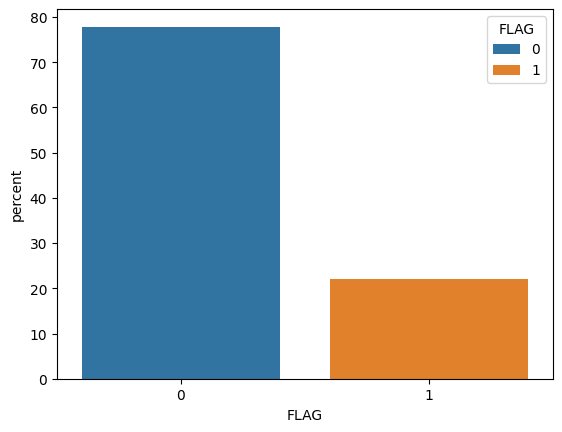

Total Records: 9841
Target:  FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64


In [8]:
sns.countplot(x=eth_ds.FLAG,hue=eth_ds.FLAG,stat='percent')
plt.show()
print('Total Records:', eth_ds.FLAG.shape[0])
print('Target: ', eth_ds['FLAG'].value_counts(normalize=True))

FLAG
0    7662
1    2179
Name: count, dtype: int64


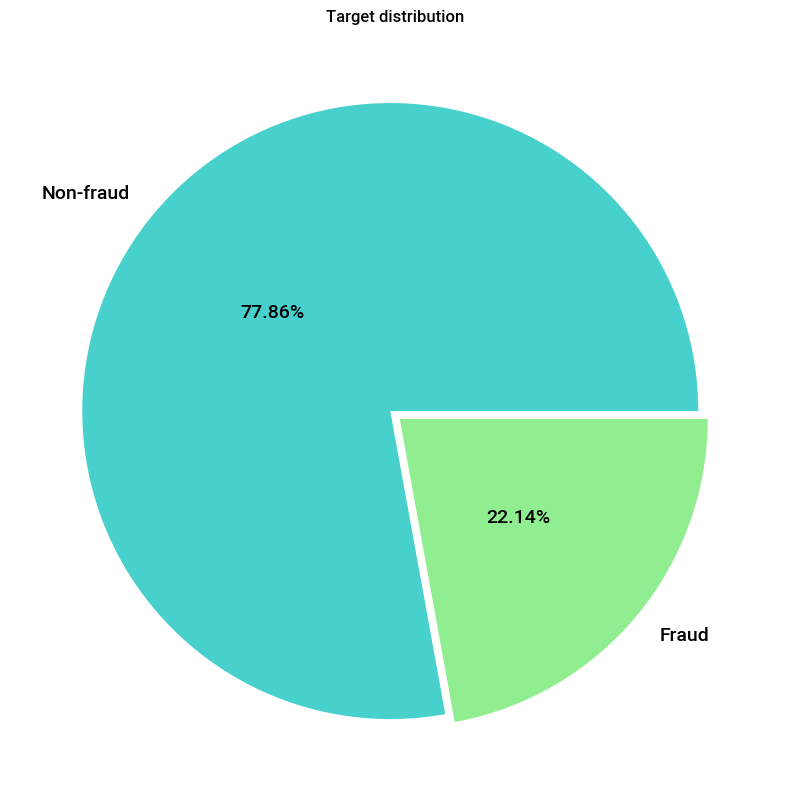

In [14]:
# Inspect target distribution
print(eth_ds['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['mediumturquoise', 'lightgreen']
plt.pie(x = eth_ds['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

From the above plot, we can observe a major imbalance in the dataset. We can observe that 22% of the total transactions are fraudulent.

In [9]:
eth_ds.isnull().sum()/eth_ds.shape[0]*100

FLAG                                                     0.000000
Avg min between sent tnx                                 0.000000
Avg min between received tnx                             0.000000
Time Diff between first and last (Mins)                  0.000000
Sent tnx                                                 0.000000
Received Tnx                                             0.000000
Number of Created Contracts                              0.000000
Unique Received From Addresses                           0.000000
Unique Sent To Addresses                                 0.000000
min value received                                       0.000000
max value received                                       0.000000
avg val received                                         0.000000
min val sent                                             0.000000
max val sent                                             0.000000
avg val sent                                             0.000000
min value 

In [22]:
eth_ds[eth_ds[' Total ERC20 tnxs'].isnull()]

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7662,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916,0.0,0.0,0.0,16,17.528747,17.529785,0.0,0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,1,0.00,0.00,15432.58,1,1,0,1,1,1.000000,1.000000,1.000000,0.999538,0.999538,0.999538,0.0,0.0,0.0,2,0.999538,1.000000,0.0,0.000462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,1,0.00,0.00,0.00,0,1,0,1,0,0.001540,0.001540,0.001540,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.001540,0.0,0.001540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,1,259.52,2.60,4417.03,17,2,5,2,6,0.003349,0.070000,0.036675,0.000000,0.044494,0.003218,0.0,0.0,0.0,24,0.054714,0.073349,0.0,0.018635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,1,193.09,81.82,1485.80,6,4,0,3,6,0.000100,8.293050,2.598288,0.312210,7.013525,1.731872,0.0,0.0,0.0,10,10.391234,10.393150,0.0,0.001916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,1,0.00,49.51,12643.85,1,15,0,15,1,0.020005,5.000000,1.025080,15.375782,15.375782,15.375782,0.0,0.0,0.0,16,15.375782,15.376202,0.0,0.000420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can notice from the above code snippet that the rows containing no ERC20 data is marked as fraudulent.. The following analysis indicates that we can model ERC20 Related stats as a feature to detect fraudulent transactions

In [21]:
eth_ds[eth_ds[' Total ERC20 tnxs'].notnull()]

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,2.0,1.337000e+01,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,2.0,,Blockwell say NOTSAFU
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com


### Automated data analysis using sweetviz

In [10]:
aut_report = sv.analyze(eth_ds,target_feat='FLAG')

                                             |          | [  0%]   00:00 -> (? left)

In [11]:
aut_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Visualization

<Axes: xlabel='total Ether sent', ylabel='total ether received'>

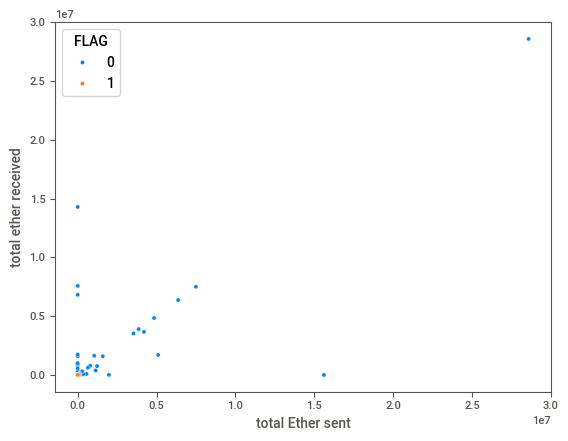

In [12]:
sns.scatterplot(x=eth_ds['total Ether sent'],y=eth_ds['total ether received'],hue=eth_ds.FLAG)

In [ ]:
# Data Correlation heatmap


Data Cleaning and PreProcessing

In [15]:
# Drop the two categorical features
eth_ds.drop(columns=categories , inplace=True)

In [16]:
#Null value treatment
for col in eth_ds.columns:
    if(eth_ds[col].isnull().sum()):
        eth_ds[col].fillna(0,inplace=True)
    else:
        pass

In [18]:
eth_ds.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [21]:
eth_ds.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

We can remove the columns that have 0 variance as they have the same value throughout the dataset and provide no insights to model training.

In [20]:
# Filtering the features with 0 variance
no_var = eth_ds.var() == 0
print(eth_ds.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
eth_ds.drop(eth_ds.var()[no_var].index, axis = 1, inplace = True)
print(eth_ds.var())
print(eth_ds.shape)

Series([], dtype: float64)


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg v

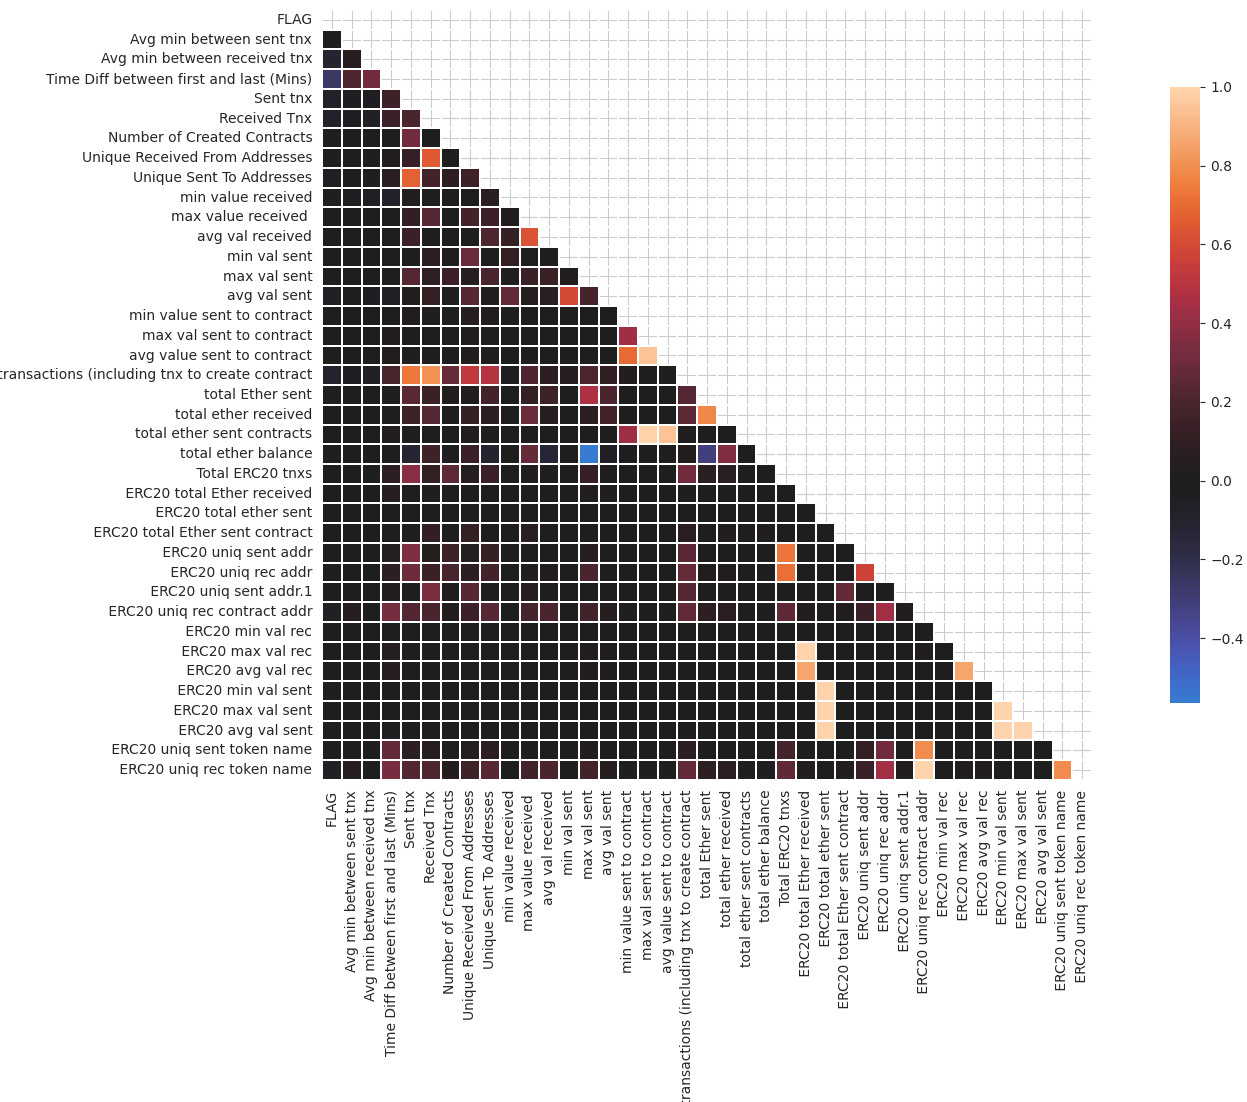

In [125]:
# Correlation Analysis
corr = eth_ds.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(corr,  mask=mask, annot=False, center=0, linewidths=0.08, square=True,cbar_kws={"shrink": .8})

In [22]:
corr_drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
eth_ds.drop(corr_drop, axis=1, inplace=True)

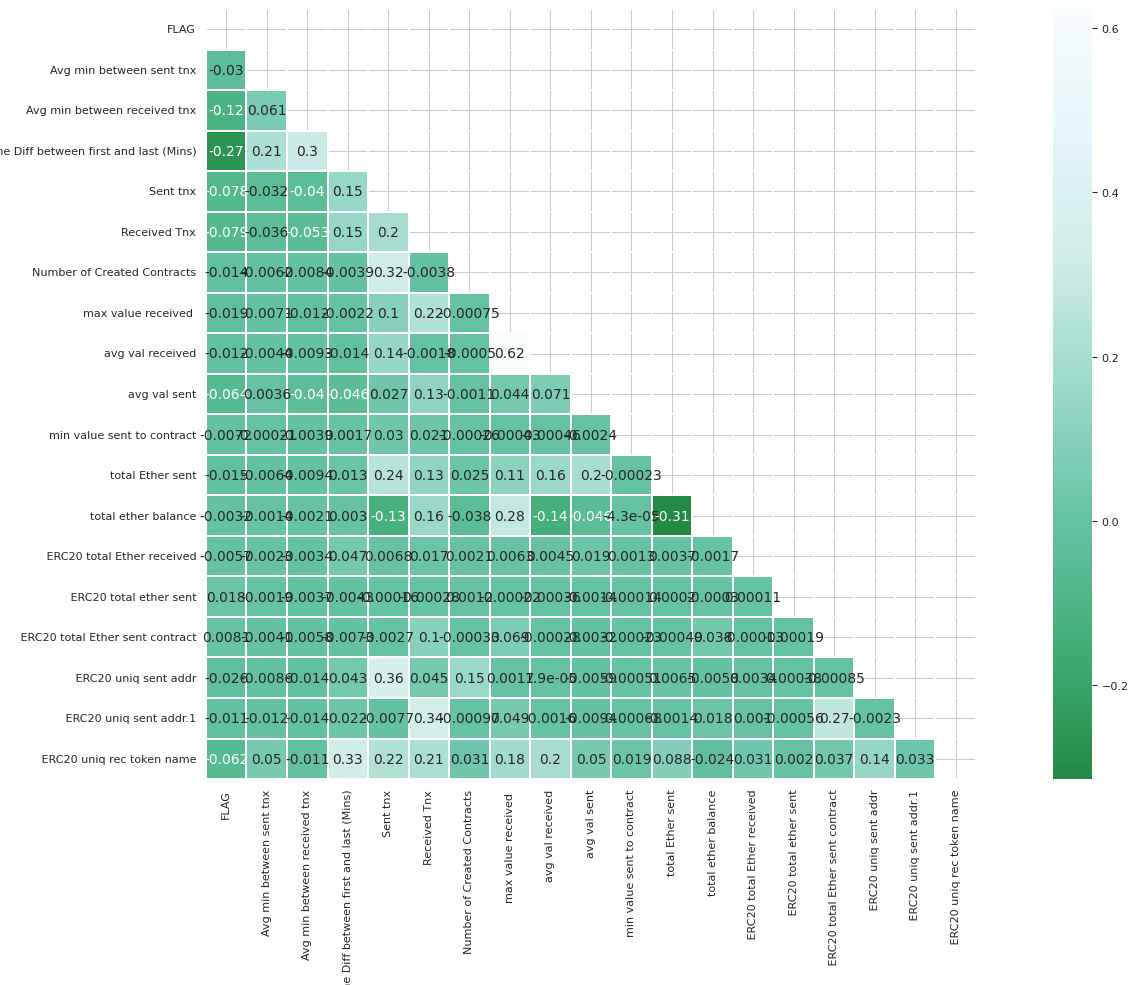

In [23]:
# Recheck the Correlation matrix
corr = eth_ds.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='BuGn_r', center=0, linewidths=0.1, square=True)

In [24]:
# Some features present a small distribution
for i in eth_ds.columns[1:]:
    if len(eth_ds[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{eth_ds[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


In [25]:
eth_ds.drop(columns = ['min value sent to contract', ' ERC20 uniq sent addr.1'], inplace=True)


### Modelling

In [26]:
y = eth_ds.iloc[:, 0]
X = eth_ds.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [27]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [28]:
# Scaling or Normalization of Numerical features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Converting it back to dataframes for easier handling
X_train = pd.DataFrame(X_train,columns=eth_ds.columns[1:])
X_test = pd.DataFrame(X_test,columns=eth_ds.columns[1:])

## PCA for dimensionality reduction.

In [33]:
# PCA Initialization
n_components = 16
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

# Apply PCA on training dataset.
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA)


In [34]:
# Evaluation of PCA
# Percentage of Variance Captured by 16 principal components
print("Variance Explained by all 16 principal components: ",sum(pca.explained_variance_ratio_))

Variance Explained by all 16 principal components:  1.0


This means that the entire variance of the dataset is preserved in 16 components. Now let's further break down variance preserved per component.

In [48]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T
print('Variance Captured by First 1 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values)
print('Variance Captured by First 2 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:2].sum(axis=1).values)
print('Variance Captured by First 5 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:5].sum(axis=1).values)
print('Variance Captured by First 8 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:8].sum(axis=1).values)
print('Variance Captured by First 10 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 12 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:12].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
importanceOfPrincipalComponents.loc[:,0:16].sum(axis=1).values)

Variance Captured by First 1 Principal Components:  [0.73590657]
Variance Captured by First 2 Principal Components:  [0.83846185]
Variance Captured by First 5 Principal Components:  [0.95812318]
Variance Captured by First 8 Principal Components:  [0.97982398]
Variance Captured by First 10 Principal Components:  [0.98437473]
Variance Captured by First 12 Principal Components:  [0.99164562]
Variance Captured by First 20 Principal Components:  [0.99164562]


From the above observations we can note that 99% of the data's variance is captured in the first 12 components. Hence, we can reduce the dimensionality to 12 components.

In [38]:
# PCA Initialization
n_components = 12
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

# Apply PCA on training dataset.
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA)

Text(0.5, 1.0, 'Separation of Observations using PCA')

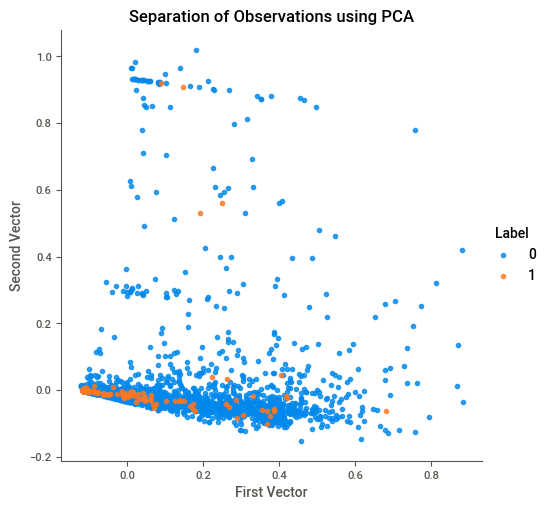

In [55]:
vector_sample_df = pd.concat((X_train_PCA.loc[:,0:1],y_train),axis=1,join='inner')
vector_sample_df.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=vector_sample_df, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations using PCA")


The plot helps us understand how the components condense the data into a feature set that can better distinguish between fraudulent and non-fraudulent transactions.

From the above experiment using PCA, we can conclude that, PCA can successfully condense data from high dimensions to a condense lower space high variance (importance) feature set.

Notes:
* During production. A datapoint must undergo scaling and PCA before being passed to the model.

### PCA based Anomaly Detection Model

### Anomaly Score Function
We define a function that calculates how anomalous each
transaction is. The more anomalous the transaction is, the more likely it is to be
fraudulent, assuming that fraud is rare and looks somewhat different than the
majority of transactions, which are normal.


In [145]:
def is_anomaly(x):
    if(x>0.5):
        return 1
    else:
        return 0 

def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [146]:
# Plot Results
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.DataFrame({'trueLabel':trueLabels,'anomalyScore':anomalyScores})
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
    preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    if returnPreds==True:
        return preds
# Scatter plot function
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
    data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)


In [161]:
n_components = 5
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)


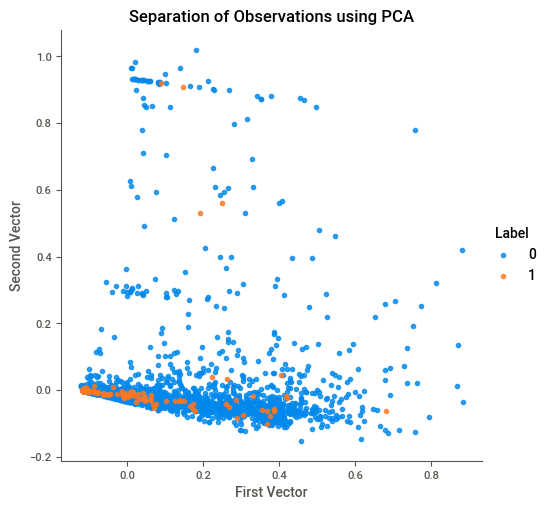

In [162]:
scatterPlot(X_train_PCA, y_train, "PCA")

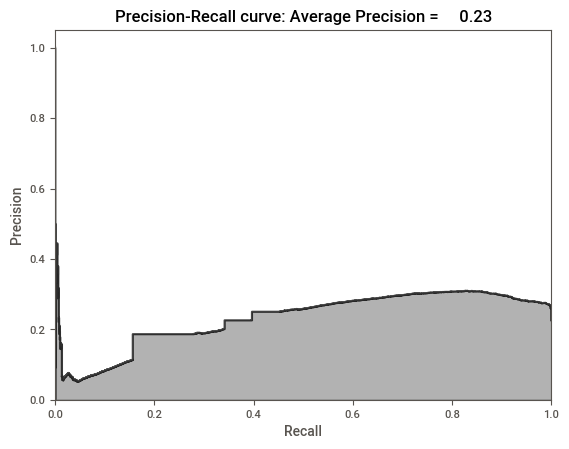

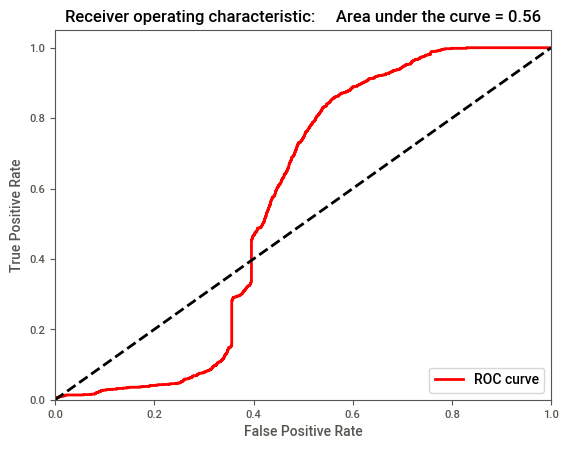

In [163]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train.reset_index(drop=True), anomalyScoresPCA.reset_index(drop=True), True)

From the performance plot, PCA based anomaly detection does not yield satisfactory results. This may be due to the following reasons:
* No strong features that distinguish fraudulent from non-fraudulent transactions.
* False marking of transactions as fraud.